## Assignment 2: Deep Neural Network 


### Giới thiệu

Để có thể hoàn tất bài tập này, các bạn cần nắm rõ những kiến thức sau:

    - Neural Networks - Fully connected networks là gì, nguyên tắc hoạt động ra sao.
	- Giải thuật Feedforward và BackPropagation trong bài toán NN.
	- Giải thuật gradient descent - Batch and Mini-batch.
	- Regularization để tránh overfitting trong NN.

Các bạn có thể tham khảo lại bài giảng của lớp để nắm vững các nội dung này. Ngoài ra, các bạn có thể đặt câu hỏi cho đội ngũ giảng dạy nếu có thắc mắc. 

Trong bài tập này các bạn sẽ sử dụng Neural Networks để giải quyết 2 bài toán:

	- Bài 1: phân loại dữ liệu BAT, gồm 3 lớp.
![Dữ liệu 3 class BAT](https://i.imgur.com/d1Pd1XT.png)
	- Bài 2: phân loại tập fashion MNIST, gồm 10 lớp.
![Dữ liệu Fashion MNIST](https://i.imgur.com/O9dqdId.png)
Yêu cầu dành cho các bạn trong là giải quyết hai bài trên bằng Numpy và TensorFlow.

Mục tiêu của bài tập lần này là hiện thực Neural Networks mạng Fully Connected một cách cơ bản trên Numpy và Tensorflow. Một mạng cơ bản sẽ gồm nhiều hidden layers và một lớp softmax tại layer cuối cùng phù hợp cho việc phân loại dữ liệu. 

![Mạng neural network. Nguồn: graphicsminer.com/neuralnetwork](https://i.imgur.com/K3Yvt20.png)

Khi thiết kế một mạng cơ bản thì người dùng có thể quyết định số input feature cho tầng input. Số output sẽ là số lớp mà người đó muốn phân loại. Ví dụ như bài toán fashion MNIST thì số feature đầu vào chính bằng số pixel của mỗi ảnh, số nút đầu ra sẽ bằng số lớp cần phân loại (10). Đối với số lượng hidden layer và số lượng nodes tương ứng, ta có thể tùy chọn.

Một chú ý rất quan trọng là số nodes đầu ra của layer trước sẽ là số inputs đầu vào của layers sau đó.


## I. Thực hiện Deep Neural Network với Numpy
### Những công việc bạn phải thực hiện 

1. Các hàm activation `sigmoid`, `tanh`, `relu`, `softmax` và đạo hàm của nó `sigmoid_grad`, `tanh_grad`, `relu_grad`.
2. Hàm `forward` và `backward` ở class `HiddenLayer`
```python
    class HiddenLayer:
    
        def forward(self, X):
            ...
    
        def backward(self, X, delta_prev):
            ...
```
3. Hàm `forward`, `backward`, `compute_loss` ở class `NeuralNetwork`
```python
    class NeuralNetwork:
        
        def forward(self, X):
            ...
            
        def backward(self, X, Y, layers):
            ...
            
        def compute_loss(self, Y, Y_hat):
            ...
```

### Ký hiệu

- $L$: số layers trong mạng neural network. 
- $l = 0,1,..,L$ với $0$ là layer input và $L$ layer output.
- $n^{[l]}$ là số neurons tại layer $l$
- $l-1$: layer trước theo chiều forward của $l$.
- $l+1$: layer trước theo chiều backward của $l$.
- $\sigma'(x)$: đạo hàm hàm activation theo x (general case cho cả đạo hàm sigmoid, tanh, relu).
- $Z^{[l]}$: linear function values tại layer $l$.
- $A^{[l]}$: activation function values tại layer $l$.

### Import các thư viện cần thiết

**Chú ý:** Nếu bạn chạy trên Google Colab thì các thư viện này đã được tích hợp sẵn. Nếu bạn chạy trên máy cá nhân, bạn cần install các thư viện *numpy*, *matplotlib*, *googledrivedownloader*, *sklearn*.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from google_drive_downloader import GoogleDriveDownloader as gdd
import os
import sys
from sklearn.metrics import confusion_matrix

### Download dữ liệu và các utility functions

In [ ]:
# DOWNLOAD DATA
gdd.download_file_from_google_drive(file_id='1EXSdvCLlcXvl1Gi6sNSJCu6psICoLNNc', 
                                    dest_path=os.path.join(os.getcwd(), 'Assignment2.zip'), unzip=True)

if sys.platform.startswith("win"):
    !move "./Assignment2/data" "."
    !move "./Assignment2/test" "."A
    !move "./Assignment2/utils" "."
    !del "Assignment2.zip"
    !rd /s /q "Assignment2" "__MACOSX"
    !dir
else:
    !mv Assignment2/* .
    !rm Assignment2.zip
    !rm -rf Assignment2 __MACOSX
    # SHOW THE ITEMS OF CURRENT DIRRECTORY
    !ls

Unzipping...Done.
mv: cannot move 'Assignment2/data' to './data': Directory not empty
mv: cannot move 'Assignment2/test' to './test': Directory not empty
mv: cannot move 'Assignment2/utils' to './utils': Directory not empty
data  sample_data  test  utils


### Import utility functions

In [ ]:
from utils.util import *
from utils.gradient_check import *

### Các hàm activation

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$ 

$$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

$$relu(x) = \begin{cases} x, & \mbox{if } x > 0 \\ 0, & \mbox{if } x <= 0 \end{cases}$$

$$sigmoid'(x) = sigmoid(x)(1 - sigmoid(x)) $$

$$tanh'(x) = 1 - tanh^2(x)$$

$$relu'(x) = \begin{cases} 1, & \mbox{if } x > 0 \\ 0, & \mbox{if } x <= 0 \end{cases}$$

#### \[TODO 1\] Cài đặt các hàm activation
Định nghĩa các hàm activation ở cell bên dưới. (1đ)

In [ ]:
def sigmoid(x):
    """
    Sigmoid function.
    :param x: input
    """
    #### [TODO 1] START CODE HERE #### 
    x = 1 / (1 + np.exp(-x))
    #### END CODE HERE ####
    return x


def sigmoid_grad(x):
    """
    Compute gradient of sigmoid.
    :param x: input
    """
    
    #### [TODO 1] START CODE HERE #### 
    da = sigmoid(x) * (1 - sigmoid(x))
    #### END CODE HERE ####
    return da


def relu(x):
    """
    Rectified linear unit function.
    :param x: input
    """
    
    #### [TODO 1] START CODE HERE #### 
    x = np.where(x>=0,x,0)
    #### END CODE HERE ####
    return x


def relu_grad(x):
    """
    Compute gradient of ReLU.
    :param x: input
    """
    
    #### [TODO 1] START CODE HERE #### 
    da = np.where(x>=0,1,0)
    #### END CODE HERE ####
    return da


def tanh(x):
    """
    Tanh function.
    :param x: input
    """
   
    #### [TODO 1] START CODE HERE #### 
    x = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    #### END CODE HERE ####
    return x


def tanh_grad(x):
    """
    Compute gradient for tanh.
    :param x: input
    """

    #### [TODO 1] START CODE HERE ####
    da =  1 - tanh(x)*tanh(x)
    #### END CODE HERE ####
    return da

def softmax(x):
    """
    Stable softmax function.
    :param x: input
    """
    #### [TODO 1] START CODE HERE ####
    max_x = np.max(x, axis=1, keepdims=True)
    x_exp = np.exp(x - max_x)
    probs = x_exp / np.sum(x_exp, axis=1, keepdims=True)
    #### END CODE HERE ####
    return probs 

#### Kiểm tra lại lại các hàm activation đã cài đặt

Bạn có thể kiểm tra cái hàm bạn đã cài đặt bằng đoạn code bên dưới.

In [ ]:
import pickle

np.random.seed(2019)
func_test = ["sigmoid", "relu", "tanh", "sigmoid_grad", "relu_grad", "tanh_grad", "softmax"]
test_activation = dict()
results = []
with open("test/activation.pkl", "rb") as f:
    test_activation = pickle.load(f)

test_x = test_activation["test_x"]
sample = test_activation["sample"]

for i, func_str in enumerate(func_test):
    func = eval(func_str)
    if func(test_x) is None:
        results.append(func_str)
        continue
    sample.append(func(test_x))
    if not np.allclose(func(test_x), sample[i]):
        results.append(func_str)

if len(results) == 0:
    print("Test PASS!")
else:
    print("Test FAILED: " + ", ".join(results))

Test PASS!


### Class `HiddenLayer` 

#### Hướng dẫn:

1. Hàm `forward`:
- Hàm nhận vào tham số input $X$ (là output của hidden layer trước theo chiều forward, layer $l-1$).
- Tính linear transformation của $X$ ($A^{[l-1]}$): $Z^{[l]} = XW$.
- Sau đó tính nonlinear transformation: $A^{[l]} = \sigma(Z^{[l]})$ với $\sigma$ là hàm activation.
    
2. Hàm `backward`:
- Hàm nhận vào 2 tham số input `X`(là output của hidden layer trước đó theo chiều forward) với `delta_prev` (delta trước đó theo chiều backward).
- Tính delta tại layer $l$: 
    
    $$\delta^{[l]} = \frac{\partial J}{\partial A^{[l]}}\frac{\partial A^{[l]}}{\partial Z^{[l]}} =  \delta^{[l+1]} * \sigma'(Z^{[l]})$$ 

Chú ý: $*$ operation là element-wise multiplication.
- Tính W_grad (without regularization): $\nabla W^{[l]} = (A^{[l-1]})^T\delta^{[l]} $
- With regularization:  $\nabla W^{[l]} = (A^{[l-1]})^T\delta^{[l]} + \frac{\lambda}{m} W^{[l]}$ với $\lambda$ là hệ số regularization (hyperparameter mình sẽ chọn).

#### \[TODO 2\] Hàm `forward`
Định nghĩa hàm `forward` trong class `HiddenLayer` (1đ)

#### \[TODO 3\] Hàm `backward` 
Định nghĩa hàm `backward` trong class `HiddenLayer` (2đ)
  + Tính W_grad (without regularization) (1đ)
  + Tính W_grad (with L2 regularization) (1đ)

In [ ]:
class HiddenLayer:
    """
    Abstract hidden layer used in Neural Network.
    """
    
    def __init__(self, num_neurons, activation, reg = 0.0):
        """
        Constructor for abstract hidden layer.
        
        Parameters
        ----------
        num_neurons: (integer) specify number of neurons in this layer.
        activation: (string) indicating which activation function to be used.  
                        the string must be in ["sigmoid", "relu", "tanh", "softmax"]
        reg: (float) regularization coefficient to help with overfitting.
        """
        assert activation in ["sigmoid", "relu", "tanh", "softmax"], "Activation must be in [sigmoid, relu, tanh, softmax]"
        self.num_neurons = num_neurons
        self.W = None 
        self.activation = activation
        self.reg = reg

    def forward(self, X):
        """
        Compute nonlinear function of input X.
            X -> LINEAR -> ACTIVATION.
            
        `activation_function` variable below is equal to this piece of code:
        
            if (self.activation == 'sigmoid'):
                activation_function = sigmoid
            elif (self.activation == 'relu'):
                activation_function = reLU
            elif (self.activation == 'tanh'):
                activation_function = tanh
            elif (self.activation == 'softmax'):
                activation_function = softmax
        
        Parameters
        ----------
        X: output of the previous layer (input for the current layer).
        
        Returns
        -------
        A: output of the current layer.
        """
        if self.W is None:
            W_shape = (X.shape[1], self.num_neurons)
            self.W = np.random.normal(0, np.sqrt(2/(X.shape[1]+self.num_neurons)), W_shape)
        
        activation_function = eval(self.activation) # this returns function variable
        
        #### [TODO 2] START CODE HERE ####
        self.Z = X.dot(self.W)
        A = activation_function(self.Z) # use `activation_function` function above apply to `Z`
        #### END CODE HERE ####
        return A

    def backward(self, X, delta_prev):
        """
        Compute gradient w.r.t X and W at the current layer.
            X <- LINEAR <- ACTIVATION.
            W <- LINEAR <- ACTIVATION.
        
        Parameters
        ----------
        X: output of the previous layer (input for the current layer).
        delta_prev: delta dot product with W computed from the next layer (in feedforward direction) 
                                or previous layer (in backpropagation direction)
        """
        activation_grad_function = eval(self.activation + "_grad")
        z = self.Z

        #### [TODO 3] START CODE HERE ####                                
        delta = delta_prev * activation_grad_function(z)
        W_grad = X.T.dot(delta) # without regularization
        #### END CODE HERE ####

        #### [TODO 3] START CODE HERE ####                                
        W_grad += self.reg / X.shape[0] * self.W # with L2 regularization
        #### END CODE HERE ####
        
        return W_grad, delta

#### Kiểm tra class `HiddenLayer` được cài đặt

Sau khi hoàn thành TODO 2 và TODO 3, bạn có thể kiểm tra class `HiddenLayer` bạn đã cài đặt bằng cách chạy cell bên dưới:

In [ ]:
np.random.seed(2019)
case_1 = HiddenLayer(10, "sigmoid", reg=0)
case_2 = HiddenLayer(14, "tanh", reg=0)
case_3 = HiddenLayer(17, "relu", reg=0)

case_mapping = {0: "(foward)", 1: "(backward W_grad)", 2: "(backward delta)"}

with open("test/hidden.pkl", "rb") as f:
    test_hidden = pickle.load(f)

test_x = test_hidden["test_x"]
sample = test_hidden["sample"]
test_delta = test_hidden["test_delta"]
results = []
for ind, cl_str in enumerate(["case_1", "case_2", "case_3"]):
    hidden_layer = eval(cl_str)
    case = (hidden_layer.forward(test_x), ) + hidden_layer.backward(test_x, test_delta[ind])
    for i in range(3):
        if not np.allclose(sample[ind][i], case[i]):
            results.append(cl_str + case_mapping[i])

print("TEST HiddenLayer WITHOUT REGULARIZATION")
if len(results) == 0:
    print("Test PASS!")
else:
    print("Test FAILED: " + ", ".join(results))

TEST HiddenLayer WITHOUT REGULARIZATION
Test PASS!


Các bạn nên chắc chắn rằng mình đã pass hết các test cases để làm tiếp.

#### Kiểm tra Hidden Layer với Regularization

Các bạn có thể bỏ qua phần test case này nếu chưa làm với Regularization.

In [ ]:
np.random.seed(2019)
case_1 = HiddenLayer(10, "sigmoid", reg=0.9)
case_2 = HiddenLayer(14, "tanh", reg=0.9)
case_3 = HiddenLayer(17, "relu", reg=0.9)

case_mapping = {0: "(foward)", 1: "(backward W_grad)", 2: "(backward delta)"}

with open("test/hidden_reg.pkl", "rb") as f:
    test_hidden = pickle.load(f)

test_x = test_hidden["test_x"]
sample = test_hidden["sample"]
test_delta = test_hidden["test_delta"]
results = []
for ind, cl_str in enumerate(["case_1", "case_2", "case_3"]):
    hidden_layer = eval(cl_str)
    case = (hidden_layer.forward(test_x), ) + hidden_layer.backward(test_x, test_delta[ind])
    for i in range(3):
        if not np.allclose(sample[ind][i], case[i]):
            results.append(cl_str + case_mapping[i])

print("TEST HiddenLayer WITH REGULARIZATION")
if len(results) == 0:
    print("Test PASS!")
else:
    print("Test FAILED: " + ", ".join(results))

TEST HiddenLayer WITH REGULARIZATION
Test PASS!


### Class `NeuralNetwork`

#### Hướng dẫn:

1. Hàm `forward`:
- Sử dụng hàm `forward` class `HiddenLayer`. Output của layer này [$l$] sẽ là input của layer sau [$l+1$]. Thêm output của layer [$l$] vào list `all_X` 


2. Hàm `compute_loss`:
- Cross-entropy, không regularization: $$J = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^C y_{ik}\log(a_{ik}^{[L]})$$
- Cross-entropy, L2 regularization: $$J = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^C y_{ik}\log(a_{ik}^{[L]}) + \frac{\lambda}{2m}\sum_{l=1}^L\|\mathbf{W}^{[l]} \|_2^2$$
    
    
3. Hàm `backward`:

- Tính `delta_last` $\delta^{[L]} $ và `grad_last` $\nabla W^{[L]}$ theo hàm softmax (để ý superscript [L]): 
    
    $$\delta^{[L]} = \frac{\partial J}{\partial \mathbf{A}^{[L]}}\frac{\partial \mathbf{A}^{[L]}}{\partial \mathbf{Z}^{[L]}} = \frac{1}{m} (\mathbf{A}^{[L]} - \mathbf{Y})$$

    - **Without regularization:**
        
        $$\nabla W^{[L]} = \frac{\partial J}{\partial \mathbf{A}^{[L]}}\frac{\partial \mathbf{A}^{[L]}}{\partial \mathbf{Z}^{[L]}}\frac{\partial \mathbf{Z}^{[L]}}{\partial \mathbf{W}^{[L]}} = \delta^{[L]} \frac{\partial \mathbf{Z}^{[L]}}{\partial \mathbf{W}^{[L]}} = (\mathbf{A}^{[L-1]})^T \delta^{[L]} $$

    - **With L2 regularization:**

        $$\nabla \mathbf{W}^{[L]} = (\mathbf{A}^{[L-1]})^T \delta^{[L]} + \frac{\lambda}{m} W^{[l]}$$

- Tính `delta_prev` $\delta^{[l]}$ và `grad_W` $\nabla \mathbf{W}^{[l]}$ ở các tầng ở giữa:
    
    $$\delta^{[l]} = \left(\delta^{[l+1]}(\mathbf{W}^{[l+1]})^T\right) * \sigma'(\mathbf{Z^{[l]}})$$
    
    - **Without regularization**
        
        $$\nabla \mathbf{W}^{[l]} = (\mathbf{A}^{[l-1]})^T \delta^{[l]}$$

    - **With L2 regularization**

        $$\nabla \mathbf{W}^{[l]} = (\mathbf{A}^{[l-1]})^T \delta^{[l]} + \frac{\lambda}{m} W^{[l]}$$
        
Mục đích tính `delta` để tính gradient của `W` ở các tầng trước theo chiều forward.

#### \[TODO 4\] Hàm `forward`
Định nghĩa hàm `forward` trong class `NeuralNetwork` (0.5đ)

#### \[TODO 5\] Hàm `compute_loss`
Định nghĩa hàm `compute_loss` trong class `NeuralNetwork` (1.5đ)
  + Loss without regularization
  + Loss of L2 regularization

#### \[TODO 6\] Hàm `compute_delta_grad_last`
Định nghĩa hàm `compute_delta_grad_last` trong class `NeuralNetwork` (1đ)
  + Without regularization (0.5đ)
  + With L2 regularization (0.5đ)

#### [TODO 7] Hàm `backward`
Định nghĩa hàm `backward` trong class `NeuralNetwork` (1đ)

#### \[TODO 8\] Hàm `update_weight_momentum`
Định nghĩa hàm `update_weight_momentum` trong class `NeuralNetwork`. (1đ)

In [ ]:
class NeuralNetwork:
    
    def __init__(self, learning_rate, num_class=2, reg = 1e-5):
        self.layers = []
        self.reg = reg
        self.num_class = num_class
        self.learning_rate = learning_rate
        
    def add_layer(self, num_neurons, activation):
        """
        Function to add a hidden layer to neural network.
        
        Parameters
        ----------
        num_neurons: hyperparameter that specify nuber of neurons new hidden layer have/
        activation: string, indicating which activation function to be used
        """
        assert activation in ["sigmoid", "relu", "tanh", "softmax"], "Activation must be in [sigmoid, relu, tanh, softmax]"
        self.layers.append(HiddenLayer(num_neurons, activation, self.reg))

    def forward(self, X):
        """
        Do forward propagation in the neural network
        
        Parameters
        ----------
        X: raw input X.
        
        Returns
        -------
        all_X: list of all X computed at each layer. 
        """
        all_X = [X]
        #### [TODO 4] START CODE HERE ####
        temp = X
        for i in range(len(self.layers)):
            temp = self.layers[i].forward(temp)
            all_X.append(temp)
        #### END CODE HERE ####
        
        return all_X
    
    def compute_loss(self, Y, Y_hat):
        """
        Compute the average cross entropy loss using Y (label) and Y_hat (predicted class)
                    and plus with regularization loss.
        Parameters
        ----------
        Y:  the label, the actual class of the samples. This is one-hot encoding vector.
                E.g: [0, 1, 2, 1] => [[1, 0, 0],
                                      [0, 1, 0],
                                      [0, 0, 1],
                                      [0, 1, 0]]
        Y_hat: the propabilities of classes (output of softmax).
        
        Returns
        -------
        
        """
        #estimating cross entropy loss from y_hat and y
        #### [TODO 5] START CODE HERE ####
        correct_log_probs = Y * np.log(Y_hat)
        data_loss = np.sum(correct_log_probs)
        data_loss = - data_loss / Y.shape[0] # loss without regularization
        #### END CODE HERE ####

        #estimating regularization loss from all layers
        reg_loss = 0.0
        #### [TODO 5] START CODE HERE ####
        # compute reg_loss
        sum = 0
        for i in range(len(self.layers)):
            temp = np.sum(self.layers[i].W**2)
            sum += temp
        reg_loss = 0.5 / Y.shape[0] * self.reg * sum
        #### END CODE HERE ####
        data_loss += reg_loss # loss with L2 regularization

        return data_loss

    def compute_delta_grad_last(self, Y, all_X):
        """
        Special formula to compute delta last and gradient last.
        
        Parameters
        ----------
        Y:  the label, the actual class of the samples. This is one-hot encoding vector.
                E.g: [0, 1, 2, 1] => [[1, 0, 0],
                                      [0, 1, 0],
                                      [0, 0, 1],
                                      [0, 1, 0]]
                                      
        all_X: raw input data and activation output from every layer
        """
        m = Y.shape[0]
        #### [TODO 6] START CODE HERE ####
        delta_last = (all_X[-1] - Y) / m
        grad_last = all_X[-2].T.dot(delta_last) + + (self.layers[-1].W * self.reg / m)
        #### END CODE HERE ####
        return delta_last, grad_last

    def backward(self, Y, all_X):
        """
        Backpropagation algorithm to compute gradient at each layer.

        Parameters
        ----------
        Y:  the label, the actual class of the samples. This is one-hot encoding vector.
                E.g: [0, 1, 2, 1] => [[1, 0, 0],
                                      [0, 1, 0],
                                      [0, 0, 1],
                                      [0, 1, 0]]
        all_X: raw input data and activation output from every layer
        
        Returns
        -------
        grad_list: list of gradients we've just computed at each layer.
        """
        
        # Compute delta_last and  grad_last from the output
        delta_prev, grad_last = self.compute_delta_grad_last(Y, all_X)

        grad_list = [grad_last]

        for i in range(len(self.layers) - 1)[::-1]:
            prev_layer = self.layers[i+1] # previous layer as backward direction
            layer = self.layers[i]
            X = all_X[i]
            #### [TODO 7] START CODE HERE ####
            delta_prev =  delta_prev.dot(prev_layer.W.T) # dot product of delta_prev and W_prev
            grad_W, delta_prev = layer.backward(X, delta_prev)
            #### END CODE HERE ####
            grad_list.append(grad_W)

        grad_list = grad_list[::-1]
        return grad_list

    def update_weight(self, grad_list):
        """
        Update W by gradient descent using the computed gradient.
        
        Parameters
        ----------
        grad_list: (list) list of gradients from all layers that computed from backward function above
        learning_rate: (float) learning rate for gradient descent.
        """
        for i, layer in enumerate(self.layers):
            grad = grad_list[i]
            layer.W = layer.W - self.learning_rate * grad
    
    def update_weight_momentum(self, grad_list, momentum_rate):
        """
        Update W using gradient descent with momentum

        Parameters
        ----------
        grad_list: (list) list of gradients from all layers that computed from backward function above
        learning_rate: (float) learning rate.
        momentum_rate: (float) momentum rate.
        """
        if not hasattr(self, "momentum"):
            self.momentum = [np.zeros_like(grad) for grad in grad_list]
            
        #### [TODO 8] START CODE HERE ####
        for i, layer in enumerate(self.layers):
            grad = grad_list[i]
            self.momentum[i] = momentum_rate * self.momentum[i] + self.learning_rate * grad
            layer.W = layer.W - self.momentum[i]
        #### END CODE HERE ####
            
    def predict(self, X_test):
        Y_hat = self.forward(X_test)[-1]
        return np.argmax(Y_hat, axis=1)

### Training

Sau khi định nghĩa các classes HiddenLayer và NeuralNetwork, chúng ta thực hiện huấn luyện (training) mô hình. Trong bài tập này, 2 kỹ thuật training được giới thiệu:
  
  + Batch training
  + Mini-batch training

#### Batch train

Định nghĩa hàm `batch_train` để  train trên toàn dữ liệu. Có nghĩa là weights `W` trên mạng neural network sẽ được update trên toàn điểm dữ liệu, thay vì ở mỗi batch điểm dữ liệu như là `mini_batch_train`

In [ ]:
 def batch_train(X_train, Y_train, epochs, neural_network, bat=False):
    """
    Using batch train.
    
    Parameters
    ----------
    X_train: training data X.
    Y_train: training data Y.
    epochs: number of iterations that we should use to train.
    neural_network: NeuralNetwork object instance above.
    """
    all_loss = []
    display_step = 100 if bat else 10

    for e in range(epochs):
        all_X = neural_network.forward(X_train)
        loss = neural_network.compute_loss(Y_train, all_X[-1])
        grad_list = neural_network.backward(Y_train, all_X)
        neural_network.update_weight(grad_list)
        
        all_loss.append(loss)
        
        if (e+1) % display_step == 0:
            display.clear_output(wait=True)
            if bat:
                y_hat = neural_network.forward(X_train)[-1]
                visualize_point(X_train, np.argmax(Y_train,axis=1), y_hat)
            plot_loss(all_loss, title="Loss epoch %s: %.4f" % (e+1, loss), color=2)
            plt.show()
            plt.pause(0.01)

#### \[TODO 9\] Mini-batch train
Định nghĩa hàm `mini_batch_train` (2đ)

**Pseudocode:**

```
-> For each epoch do:
    -> Shuffle data
    -> Set initial loss at that epoch equal to 0
    -> Calculate number of batches based on batch size and total number of data points
    -> For each batch do:
        -> all_X := nn.forward() at that batch, Y_hat is equal all_X[-1]
        -> compute loss at that batch
        -> initial loss += computed loss at that batch
        -> grad_list := nn.backward()
        -> update weights.
```

In [ ]:
 def minibatch_train(X_train, Y_train, epochs, batch_size, num_class, neural_network):
    """
    Using batch train.
    
    Parameters
    ----------
    X_train: training data X.
    Y_train: training data Y.
    epochs: number of iterations that we should use to train.
    batch_size: number of batch at each update.
    neural_network: NeuralNetwork object instance above.
    
    """
    #### [TODO 9] START CODE HERE ####
    all_loss = []
    display_step = 100

    for e in range(epochs):
        rand_i = np.arange(X_train.shape[0])
        np.random.shuffle(rand_i)
        X_train = X_train[rand_i]
        Y_train = Y_train[rand_i]
        loss = 0
        num_batch = Y_train.shape[0] // batch_size
        for i in range(num_batch):
            if i < num_batch-1:
              X = X_train[batch_size * i: batch_size *(i+1)]
              Y = Y_train[batch_size * i: batch_size *(i+1)]
            else:
              X = X_train[batch_size * i:]
              Y = Y_train[batch_size * i:]

            all_X = neural_network.forward(X)
            Y_hat = all_X[-1]
            loss += neural_network.compute_loss(Y, Y_hat)
            grad_list = neural_network.backward(Y, all_X)
            neural_network.update_weight(grad_list)

        all_loss.append(loss)

        if (e+1) % display_step == 0:
            display.clear_output(wait=True)
            plot_loss(all_loss, title="Loss epoch %s: %.4f" % (e+1, loss), color=2)
            plt.show()
            plt.pause(0.01)   
    #### END CODE HERE ####

### Bat Classification

#### Hyperparameters

In [ ]:
# Thay đổi giá trị của các hyperparameter bên dưới và
# quan sát sự thay đổi của loss và quá trình training 
EPOCHS = 1000
LEARNING_RATE = 0.01
REG= 1e-5
BATCH_SIZE = 64

#### Định nghĩa hàm `bat_classification`

In [ ]:
def bat_classification(use_batch_train=True):
    # Load data from file
    # Make sure that bat.dat is in data/
    train_X, train_Y, test_X, test_Y = get_bat_data()
    train_X, _, test_X = normalize(train_X, train_X, test_X)    

    test_Y  = test_Y.flatten()
    train_Y = train_Y.flatten()
    num_class = (np.unique(train_Y)).shape[0]

    # Pad 1 as the third feature of train_x and test_x
    train_X = add_one(train_X) 
    test_X = add_one(test_X)
    
    train_Y = create_one_hot(train_Y, num_class)

    # Create NN classifier
    # Bạn có thể biến đổi thêm/bớt hidden layer, thay đổi hàm activation cho mỗi layer
    # và quan sát sự khác biệt trong quá trình train.
    net = NeuralNetwork(learning_rate=LEARNING_RATE, num_class=num_class, reg=REG)
    net.add_layer(100, 'relu')
    net.add_layer(100, 'relu')
    net.add_layer(100, 'relu')
    net.add_layer(num_class, 'softmax')

    if use_batch_train:
        #Batch training - train all dataset
        batch_train(train_X, train_Y, EPOCHS, net, True)
    else:
        #Minibatch training - training dataset using Minibatch approach
        minibatch_train(train_X, train_Y, EPOCHS, BATCH_SIZE, num_class, net)
    metrics = confusion_matrix(test_Y, net.predict(test_X))
    print("Confusion metrix: ")
    print(metrics)
    
    print("Accuracy: ")
    print(metrics.trace()/test_Y.shape[0])

#### Training

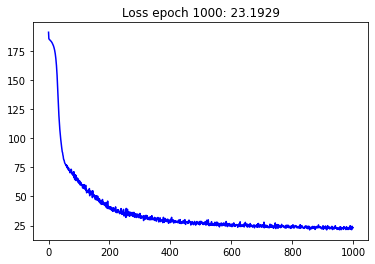

Confusion metrix: 
[[1413   74    0]
 [   9 1058   41]
 [   0   28  377]]
Accuracy: 
0.9493333333333334


In [ ]:
bat_classification(use_batch_train=False)

### MNIST Classification

#### Hyperparameters

In [ ]:
# Thay đổi giá trị của các hyperparameter bên dưới và
# quan sát sự thay đổi của loss và quá trình training
EPOCHS = 100
LEARNING_RATE = 0.01
REG= 1e-5
BATCH_SIZE = 64

#### Định nghĩa hàm `mnist_classification`

In [ ]:
def mnist_classification(use_batch_train=True):
    # Load data from file
    # Make sure that fashion-mnist/*.gz is in data/
    train_X, train_Y, val_X, val_Y, test_X, test_Y = get_mnist_data(1)
    train_X, val_X, test_X = normalize(train_X, val_X, test_X)    
    
    num_class = (np.unique(train_Y)).shape[0]

    # Pad 1 as the third feature of train_x and test_x
    train_X = add_one(train_X)
    val_X = add_one(val_X)
    test_X = add_one(test_X)
    
    train_Y = create_one_hot(train_Y, num_class)
    val_Y = create_one_hot(val_Y, num_class)

    # Create NN classifier
    net = NeuralNetwork(learning_rate=LEARNING_RATE, num_class=num_class, reg=REG)
    net.add_layer(128, 'relu')
    net.add_layer(256, 'relu')
    net.add_layer(100, 'relu')
    net.add_layer(64, 'relu')
    net.add_layer(num_class, 'softmax')
    
    if use_batch_train:
        #Batch training - train all dataset
        batch_train(train_X, train_Y, EPOCHS, net)
    else:
        #Minibatch training - training dataset using Minibatch approach
        minibatch_train(train_X, train_Y, EPOCHS, BATCH_SIZE, num_class, net)
    metrics = confusion_matrix(test_Y, net.predict(test_X))
    print("Confusion metrix: ")
    print(metrics)

    print("Accuracy: ")
    print(metrics.trace()/test_Y.shape[0])

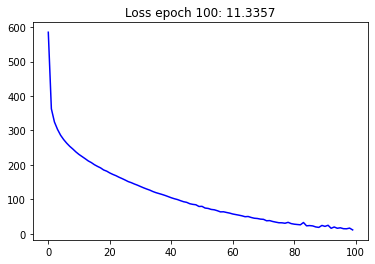

Confusion metrix: 
[[798   3  17  23   5   1 142   1  10   0]
 [  5 970   2  18   2   0   2   0   1   0]
 [ 14   0 792  13  93   0  85   0   3   0]
 [ 30  11  13 876  33   0  30   0   7   0]
 [  2   1  67  39 824   0  66   0   1   0]
 [  0   0   1   1   0 957   0  23   2  16]
 [ 85   1  76  30  57   0 741   0  10   0]
 [  0   0   0   0   0  18   0 962   2  18]
 [  6   0   4   5   7   4  10   4 960   0]
 [  1   0   0   0   0  14   0  32   0 953]]
Accuracy: 
0.8833


In [ ]:
mnist_classification(use_batch_train=False)

## II. Thực hiện Deep Neural Network với Tensorflow

Phân loại tập dữ liệu Bat và MNIST với tensorflow.

### Import các thư viện cần thiết

In [ ]:
import tensorflow as tf
L = tf.keras.layers

In [ ]:
tf.keras.backend.clear_session()

### Cài đặt class `DNNModel`

Trong phần này bạn có các TODO sau:

#### \[TODO 10] Cài đặt kiến trúc mô hình

Yêu cầu: xây dựng kiến trúc mạng với `tf.keras.Sequential()` để chồng các hidden layers và output layer với nhau. (1đ)

#### [TODO 11] Cài đặt hàm tính accuracy

Cài đặt hàm tính accuracy. (1đ)

#### \[TODO 12\] Cài đặt hàm train
Cài đặt các bước để train mô hình trong class `DNNModel`. (2đ)

In [ ]:
class DNNModel:
    def __init__(self, hidden_layers, num_classes, activation, epochs, optimizer):
        self.hidden_layers = hidden_layers
        self.num_classes = num_classes
        self.activation = activation
        self.epochs = epochs
        self.optimizer = optimizer
        
        #Hidden layers and output layers are stacked to form a model
        self.model = tf.keras.Sequential()
        #### [TODO 10] START CODE HERE ####
        #Add hidden layers
        for i in range(len(hidden_layers)):
            self.model.add(tf.keras.layers.Dense(hidden_layers[i], activation=activation))

        #Add output layer
        self.model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
        self.model.compile(loss='categorical_crossentropy',optimizer=self.optimizer,metrics=['accuracy'])
        #### END CODE HERE ####

    def loss(self, y_hat, y):
        """
        Compute loss function.
        
        Parameters
        ----------
        y_hat: output of the last layer (softmax layer).
        y: labels/targets in our data.
        
        Returns
        -------
        Loss w.r.t y_hat and y. Should be a scalar.
        """
        return tf.reduce_mean(-tf.reduce_sum(y*tf.math.log(y_hat), axis=1), axis=0)

    def accuracy(self, y_hat, y):
        """
        Compute accuracy score.
        
        Parameters
        ----------
        y_hat: output of the last layer (softmax layer).
        y: labels/targets in our data.
        
        Returns
        -------
        Accuracy w.r.t y_hat and y. Should be a scalar.
        
        """
        #### [TODO 11] START CODE HERE ####
        m = y_hat.shape[0]
        confusion_mat = np.zeros((m, m))
        np.add.at(confusion_mat, (y, y_hat), 1)
        sum = 0
        for i in range(m):
            sum += confusion_mat[i, i]
        acc = sum / np.sum(confusion_mat)
        #### END CODE HERE ####
        return acc

    def train(self, x_train, y_train):
        all_loss = []
        all_acc = []
        for e in range(self.epochs):
            #### [TODO 12] START CODE HERE ####
            self.model.fit(x_train, y_train)
            loss, accuracy = self.model.evaluate(x_train, y_train)
            all_loss.append(loss)
            all_acc.append(accuracy)
            #### END CODE HERE ####
            
            print(f"\rEpoch: {e}... Training loss: {loss}... Accuracy: {accuracy}")

    def predict(self, inputs):
        Y_hat = self.model(inputs)
        return tf.argmax(Y_hat, axis=1)

### Bat classification

In [ ]:
def tf_bat_classification():
     # Load data from file
    # Make sure that bat.dat is in data/
    train_X, train_Y, test_X, test_Y = get_bat_data()
    train_X, _, test_X = normalize(train_X, train_X, test_X)    

    test_Y  = test_Y.flatten()
    train_Y = train_Y.flatten()
    num_class = (np.unique(train_Y)).shape[0]

    # Pad 1 as the third feature of train_x and test_x
    train_X = add_one(train_X) 
    test_X = add_one(test_X)
    
    train_Y = create_one_hot(train_Y, num_class)
    
    # DNN parameters
    hidden_layers = [100, 100, 100]
    learning_rate = 0.001
    epochs = 200
    activation = tf.nn.relu
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    #Initialize model
    dnn = DNNModel(hidden_layers=hidden_layers, num_classes=num_class,
                   activation=activation, epochs=epochs, optimizer=optimizer)
    #Train
    dnn.train(train_X, train_Y)

    # TEST
    # Confusion matrix
    metrics = confusion_matrix(test_Y, dnn.predict(test_X))
    print('Confusion matrix:')
    print(metrics)
    
    print("Accuracy: ")
    print(metrics.trace()/test_Y.shape[0])

In [ ]:
tf_bat_classification()

Reading bat data...
EOF Reached
Done reading
375/375 [==============================] - 0s 899us/step - loss: 0.5603 - accuracy: 0.7645
Epoch: 0... Training loss: 0.5602916479110718... Accuracy: 0.7645000219345093
375/375 [==============================] - 0s 823us/step - loss: 0.4230 - accuracy: 0.8188
Epoch: 1... Training loss: 0.42300114035606384... Accuracy: 0.8187500238418579
375/375 [==============================] - 0s 833us/step - loss: 0.3879 - accuracy: 0.8429
Epoch: 2... Training loss: 0.3879248797893524... Accuracy: 0.8429166674613953
375/375 [==============================] - 0s 868us/step - loss: 0.3418 - accuracy: 0.8428
Epoch: 3... Training loss: 0.3417907655239105... Accuracy: 0.8427500128746033
375/375 [==============================] - 0s 904us/step - loss: 0.3224 - accuracy: 0.8563
Epoch: 4... Training loss: 0.3223547041416168... Accuracy: 0.856333315372467
375/375 [==============================] - 0s 882us/step - loss: 0.3080 - accuracy: 0.8672
Epoch: 5... Trainin

### MNIST Classification

In [ ]:
def tf_mnist_classification():
    # Load data from file
    # Make sure that fashion-mnist/*.gz is in data/
    train_X, train_Y, val_X, val_Y, test_X, test_Y = get_mnist_data(1)
    train_X, val_X, test_X = normalize(train_X, val_X, test_X)    
    
    num_class = (np.unique(train_Y)).shape[0]

    # Pad 1 as the third feature of train_x and test_x
    train_X = add_one(train_X)
    val_X = add_one(val_X)
    test_X = add_one(test_X)
    
    train_Y = create_one_hot(train_Y, num_class)
    val_Y = create_one_hot(val_Y, num_class)

    # Define hyper-parameters and train-related parameters
    hidden_layers = [128, 256, 100, 64]
    learning_rate = 0.001
    epochs = 50
    activation = tf.nn.relu
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    #Initialize model
    dnn = DNNModel(hidden_layers=hidden_layers, num_classes=num_class,
                   activation=activation, epochs=epochs, optimizer=optimizer)
    #Train
    dnn.train(train_X, train_Y)

    # TEST
    # Confusion matrix
    metrics = confusion_matrix(test_Y, dnn.predict(test_X))
    print('Confusion matrix:')
    print(metrics)
    print("Accuracy: ")
    print(metrics.trace()/test_Y.shape[0])

In [ ]:
tf_mnist_classification()

Reading fashion MNIST data...
Done reading
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3650 - accuracy: 0.8644
Epoch: 0... Training loss: 0.3649849593639374... Accuracy: 0.8644199967384338
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3309 - accuracy: 0.8804
Epoch: 1... Training loss: 0.33088335394859314... Accuracy: 0.8804000020027161
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3002 - accuracy: 0.8885
Epoch: 2... Training loss: 0.3001958429813385... Accuracy: 0.888480007648468
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2910 - accuracy: 0.8882
Epoch: 3... Training loss: 0.29098793864250183... Accuracy: 0.8881800174713135
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2929 - accuracy: 0.8890
Epoch: 4... Training loss: 0.2928771376609802... Accuracy: 0.8890200257301331
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9043
Epoch: 5... Training

# III. Nộp bài
Sau khi thực hiện xong các bạn cần upload file bài làm .ipynb theo hướng dẫn ở [form này](https://forms.gle/yUdsDcYV6Z5eFFr89).

## IV. Thang điểm



| TODO  | Điểm  |   |   |   |
|---|---|---|---|---|
|\[TODO 1\] Cài đặt các hàm activation   |  1 |   |   |   |
|\[TODO 2\] Hàm `forward`/`HiddenLayer` | 1  |   |   |   |
|\[TODO 3\] Hàm `backward`/`HiddenLayer`  | 2  |   |   |   |
|\[TODO 4\] Hàm `forward`/`NeuralNetwork`  | 0.5  |   |   |   |
|\[TODO 5\] Hàm `compute_loss`/`NeuralNetwork`  | 1.5  |   |   |   |
|\[TODO 6\] Hàm `compute_delta_grad_last`/`NeuralNetwork`  | 1  |   |   |   |
|\[TODO 7\] Hàm `backward`/`NeuralNetwork`  | 1  |   |   |   |
|\[TODO 8\] Hàm `update_weight_momentum`/`NeuralNetwork`  | 1  |   |   |   |
|\[TODO 9\] Hàm `minibatch_train`  | 2  |   |   |   |
|\[TODO 10\] Cài đặt kiến trúc Neural network sử dụng tensorflow  | 1  |   |   |   |
|\[TODO 11\] Cài đặt hàm tính accuracy  | 1  |   |   |   |
|\[TODO 12\] Cài đặt hàm train trong class `DNNModel`  | 2  |   |   |   |
|**Tổng**| **15**  |   |   |   |

## Author: Giang Tran, Hoa Nguyen